## Problem Statement:

Netflix aims to make informed decisions on the type of content to produce and how to strategically grow its business in different countries/regions. To achieve this, the company seeks data-driven insights from the analysis of its existing dataset, which includes details of movies and TV shows available on its platform. The primary goals are to understand the content landscape in various countries, identify trends, and make recommendations for content production and expansion.

## The analysis should answer the following key questions:

1. Content Diversity by Country: What type of content is available in different countries, and how does it vary? Are there regional preferences for specific genres, languages, or content types?

2. Content Release Trends: How has the number of movies released per year changed over the last 20-30 years? Are there noticeable trends in content production over time?

3. TV Shows vs. Movies: Is there a shift in focus between TV shows and movies in recent years? How has the distribution of TV shows and movies changed?

4. Optimal Launch Time: What is the best time to launch a TV show or movie to maximize viewership and engagement?

5. Analysis of Actors/Directors: Are there any notable actors or directors associated with popular content? Do specific actors or directors have a recurring presence in successful content?

The analysis should provide Netflix with actionable recommendations on content production, release strategies, and potential growth opportunities in different regions. The recommendations should be straightforward and easy to understand, allowing the company to make informed decisions for its business expansion.


## Recommendations for Data-Driven Decisions:

Netflix's objective is to obtain actionable recommendations from the data analysis. These recommendations should be firmly rooted in the data and should serve as clear, practical, and understandable guidance for content production and business expansion. The goal is to empower Netflix with the information needed to continue delivering engaging and popular content while expanding its global reach successfully.

In summary, Netflix's aim is to harness the power of data to inform its content strategy, understand its global audience, adapt to regional preferences, and make strategic decisions for continued growth and success in the highly competitive streaming industry.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Read csv file

In [204]:
df = pd.read_csv('netflix_titles.csv')

In [205]:
df.shape

(8807, 12)

In [206]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Check datatype of each columns

In [207]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### here columns "date_added" is object so, we have to convert in to datetime.

In [208]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      6173 non-null   object        
 4   cast          7982 non-null   object        
 5   country       7976 non-null   object        
 6   date_added    8797 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8803 non-null   object        
 9   duration      8804 non-null   object        
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(10)
memory usage: 825.8+ KB


In [210]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## All columns counts and how many unique values are present what are their top and frequency

In [211]:
df.describe(include='object').transpose()

,count,unique,top,freq
show_id,8807,8807,s6606,1
type,8807,2,Movie,6131
title,8807,8807,Transformers: Rescue Bots,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362
description,8807,8775,"Paranormal activity at a lush, abandoned prope...",4


## Missing value counts for all columns

In [212]:
df.isnull().sum()/len(df) *100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

#### Most of the vales are missing from director columns and some of them from case, country

## Analysing columns by columns attribute to see data insights

In [213]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [214]:
df.columns.tolist()

['show_id',
 'type',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'rating',
 'duration',
 'listed_in',
 'description']

In [215]:
df['type'].value_counts(normalize=True)*100

Movie      69.615079
TV Show    30.384921
Name: type, dtype: float64

In [216]:
# Maintain same figure size during entire notebook
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100

In [217]:
# plt.pie??

In [218]:
df['type'].value_counts().index

Index(['Movie', 'TV Show'], dtype='object')

([<matplotlib.patches.Wedge at 0x7fcfd5ffebb0>,
 [Text(-0.6357554301059045, 0.8976720075232693, 'Movie'),
  Text(0.6357555981981311, -0.8976718884758154, 'TV Show')],
 [Text(-0.3467756891486751, 0.4896392768308741, '69.62'),
  Text(0.34677578083534416, -0.4896392118958992, '30.38')])

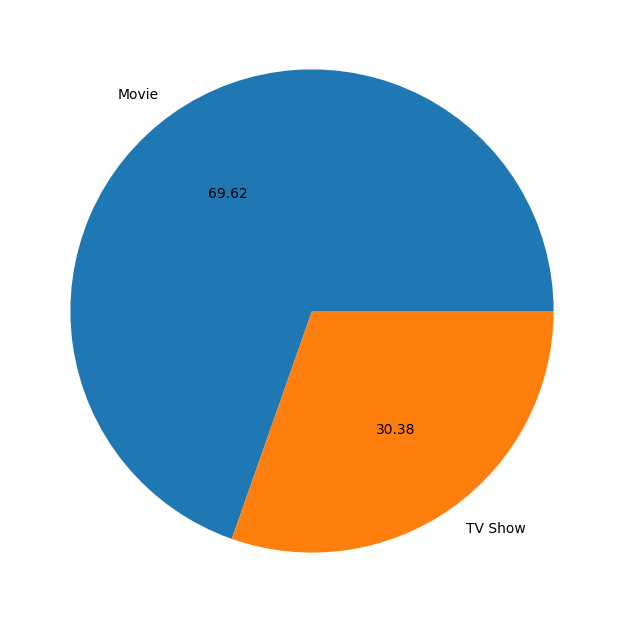

In [219]:
plt.pie(df['type'].value_counts(normalize=True)*100, autopct="%.2f",labels=df['type'].value_counts().index)

### Given data content of movie is 70% more as compair to  TV Shows which is 30%

In [220]:
#Top 5 Movies with longest title

In [345]:
long_title_index = df[['title']].applymap(len).sort_values(by='title', ascending=False).index[:5]

In [346]:
df[df.index.isin(long_title_index)]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_in_min,date_add,month,year
2813,s2814,TV Show,Ken Burns Presents: College Behind Bars: A Fil...,Lynn Novick,NaN,United States,2020-03-15,2019,TV-MA,1 Season,Docuseries,This docuseries follows several incarcerated p...,1,2020-03-15,3.0,2020.0
3240,s3241,Movie,Mike Birbiglia: What I Should Have Said Was No...,NaN,Mike Birbiglia,United States,2019-11-22,2008,TV-MA,56 min,Stand-Up Comedy,Mike Birbiglia performs in this live concert s...,56,2019-11-22,11.0,2019.0
4851,s4852,Movie,Steve Martin and Martin Short: An Evening You ...,Marcus Raboy,"Steve Martin, Martin Short",United States,2018-05-25,2018,TV-14,74 min,Stand-Up Comedy,Longtime pals and showbiz icons Steve Martin a...,74,2018-05-25,5.0,2018.0
5164,s5165,Movie,Jim & Andy: The Great Beyond - Featuring a Ver...,Chris Smith,Jim Carrey,"Canada, United States",2017-11-17,2017,TV-MA,94 min,Documentaries,Through the lens of his stunningly immersive p...,94,2017-11-17,11.0,2017.0
8462,s8463,Movie,The Power of Grayskull: The Definitive History...,"Randall Lobb, Robert McCallum",NaN,"Canada, United States",2018-08-24,2017,TV-14,96 min,Documentaries,This colorful documentary explores the origins...,96,2018-08-24,8.0,2018.0


## Data Prepration (split with cast)

In [347]:
constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df_new = pd.DataFrame(constraint,index=df['title']).stack()
df_new=pd.DataFrame(df_new)
df_new.reset_index(inplace=True)

In [348]:
df_new

,title,level_1,0
0,Dick Johnson Is Dead,0,nan
1,Blood & Water,0,Ama Qamata
2,Blood & Water,1,Khosi Ngema
3,Blood & Water,2,Gail Mabalane
4,Blood & Water,3,Thabang Molaba
...,...,...,...
64946,Zubaan,3,Manish Chaudhary
64947,Zubaan,4,Meghna Malik
64948,Zubaan,5,Malkeet Rauni
64949,Zubaan,6,Anita Shabdish


In [349]:
df_new.columns = ['title', 'count','cast']

In [350]:
df_new = df_new[['title', 'cast']]
df_new

,title,cast
0,Dick Johnson Is Dead,nan
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
...,...,...
64946,Zubaan,Manish Chaudhary
64947,Zubaan,Meghna Malik
64948,Zubaan,Malkeet Rauni
64949,Zubaan,Anita Shabdish


# Non-Graphical Analysis: Value counts and unique attributes

In [351]:
df_new['cast'].value_counts()

nan                        825
Anupam Kher                 43
Shah Rukh Khan              35
Julie Tejwani               33
Takahiro Sakurai            32
                          ... 
Elle-Máijá Tailfeathers      1
Nick Sumida                  1
Alia Nemry                   1
Desmond Richardson           1
Benjamin Abras               1
Name: cast, Length: 36440, dtype: int64

## Merge or join splited data to main_data frame

In [352]:
final_df = df.merge(df_new, on='title')
final_df

,show_id,type,title,director,cast_x,country,date_added,release_year,rating,duration,listed_in,description,duration_in_min,date_add,month,year,cast_y
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,2021-09-25,9.0,2021.0,nan
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,2021-09-24,9.0,2021.0,Ama Qamata
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,2021-09-24,9.0,2021.0,Khosi Ngema
3,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,2021-09-24,9.0,2021.0,Gail Mabalane
4,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,2021-09-24,9.0,2021.0,Thabang Molaba
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64946,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,2019-03-02,3.0,2019.0,Manish Chaudhary
64947,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,2019-03-02,3.0,2019.0,Meghna Malik
64948,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,2019-03-02,3.0,2019.0,Malkeet Rauni
64949,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2019-03-02,2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,111,2019-03-02,3.0,2019.0,Anita Shabdish


In [370]:
directors = final_df[final_df['director'].notna()].groupby('director')['title'].nunique().reset_index()
directors.sort_values(by='title', ascending=False, inplace=True)
top_5_dicrector_who_produce_more_no_of_movies  = directors[:5]
top_5_dicrector_who_produce_more_no_of_movies
# top_5_dicrector_who_produce_more_no_of_movies = df_fi

,director,title
3392,Rajiv Chilaka,19
3443,"Raúl Campos, Jan Suter",18
4046,Suhas Kadav,16
2598,Marcus Raboy,16
1790,Jay Karas,14


In [374]:
directors = final_df[final_df['cast_y'].notna()].groupby('cast_y')['title'].nunique().reset_index()
directors.sort_values(by='title', ascending=False, inplace=True)
top_5_cast_who_produce_more_no_of_movies  = directors[1:6]
top_5_cast_who_produce_more_no_of_movies

,cast_y,title
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
32591,Takahiro Sakurai,32


In [29]:
cast_count_df = pd.DataFrame(final_df.groupby('cast_y')['title'].count()).reset_index()
cast_count_df

,cast_y,title
0,Jr.,2
1,"""Riley"" Lakdhar Dridi",1
2,'Najite Dede,2
3,2 Chainz,1
4,2Mex,1
...,...,...
36435,Şevket Çoruh,1
36436,Şinasi Yurtsever,3
36437,Şükran Ovalı,1
36438,Şükrü Özyıldız,2


In [30]:
cast_count_df[cast_count_df.cast_y.str.contains('Johnny')]

,cast_y,title
15877,Johnny Baweja,1
15878,Johnny Depp,14
15879,Johnny Fay,1
15880,Johnny Flynn,3
15881,Johnny Galecki,2
15882,Johnny Hao,1
15883,Johnny Harris,1
15884,Johnny Huang,2
15885,Johnny Knoxville,7
15886,Johnny Lever,10


In [31]:
cast_count_df[cast_count_df['cast_y']=='Nawazuddin Siddiqui']


,cast_y,title
24435,Nawazuddin Siddiqui,21


In [46]:
director_movies = final_df.groupby(['director'])['title'].nunique().reset_index()
director_movies = director_movies.sort_values('title', ascending=False)
director_movies

,director,title
3392,Rajiv Chilaka,19
3443,"Raúl Campos, Jan Suter",18
4046,Suhas Kadav,16
2598,Marcus Raboy,16
1790,Jay Karas,14
...,...,...
2049,Jos Humphrey,1
2050,Jose Gomez,1
2051,Jose Javier Reyes,1
2053,"Joseduardo Giordano, Sergio Goyri Jr.",1


In [47]:
cast_movies = final_df.groupby(['cast_y'])['title'].nunique().reset_index()
cast_movies = cast_movies.sort_values('title', ascending=False)
cast_movies

,cast_y,title
36316,nan,825
2833,Anupam Kher,43
30489,Shah Rukh Khan,35
16697,Julie Tejwani,33
24215,Naseeruddin Shah,32
...,...,...
14221,Jamie Lee,1
14219,Jamie Kenna,1
14218,Jamie Kaler,1
14217,Jamie Johnston,1


## Beast actor director pair

In [279]:
final_df.groupby(['director', 'cast_y'])['director'].value_counts(ascending=False)

director      cast_y               director    
A. L. Vijay   G.V. Prakash Kumar   A. L. Vijay     1
              Hema                 A. L. Vijay     1
              Joy Mathew           A. L. Vijay     1
              Munishkanth          A. L. Vijay     1
              Murli Sharma         A. L. Vijay     1
                                                  ..
Şenol Sönmez  Seda Güven           Şenol Sönmez    1
              Somer Karvan         Şenol Sönmez    1
              Yosi Mizrahi         Şenol Sönmez    1
              Zerrin Sümer         Şenol Sönmez    1
              Özgür Emre Yıldırım  Şenol Sönmez    1
Name: director, Length: 43522, dtype: int64

## Best actor on netflix

# Visual Analysis - Univariate, Bivariate after pre-processing of the data

## Which type of shows getting good retings

<AxesSubplot:xlabel='rating', ylabel='count'>

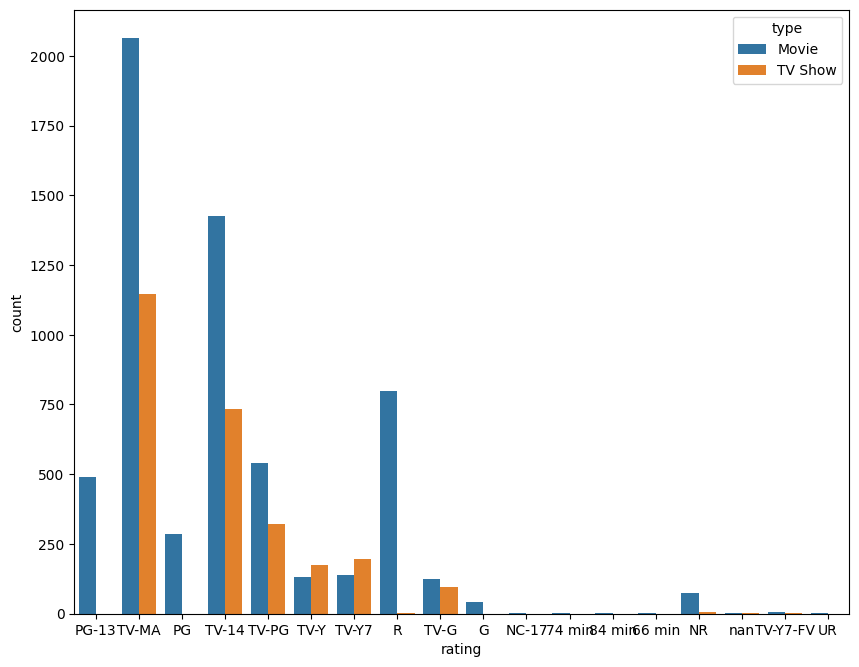

In [264]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
sns.countplot(x='rating', hue='type', data=df)

## Freauency of movies or TV shows release in year

<AxesSubplot:xlabel='release_year', ylabel='Count'>

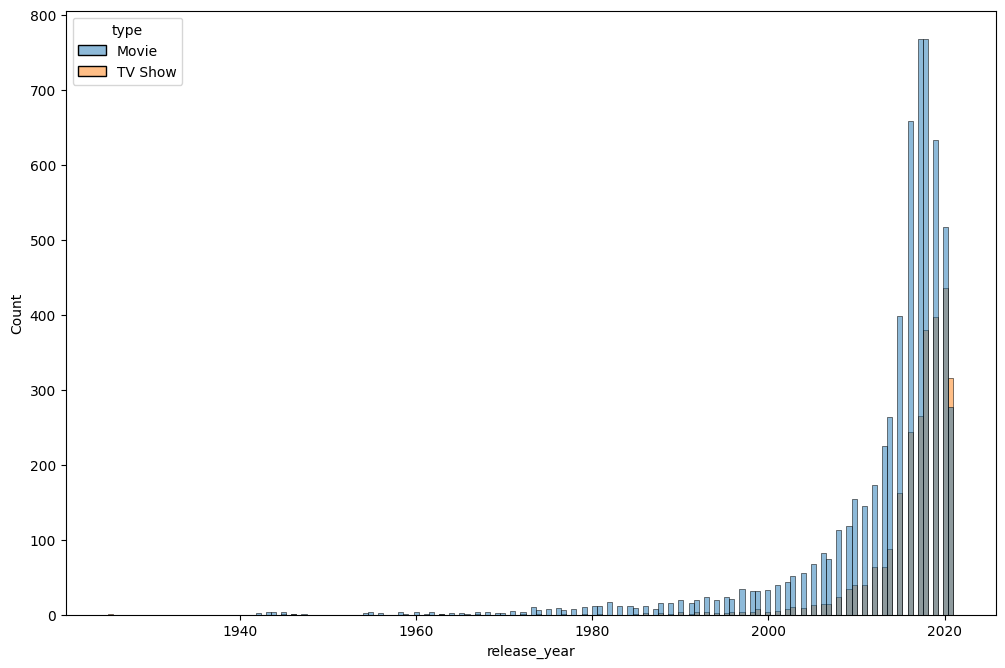

In [265]:
sns.histplot(x='release_year',hue='type',data=df)

In [266]:
df['date_add']=pd.to_datetime(df['date_added'], errors='coerce')
df['month']=df['date_add'].dt.month.fillna(-1)
df['year']=df['date_add'].dt.year.fillna(-1)


In [267]:
# sns.countplot(x='month',hue='type', data=final_df)

<AxesSubplot:xlabel='month', ylabel='count'>

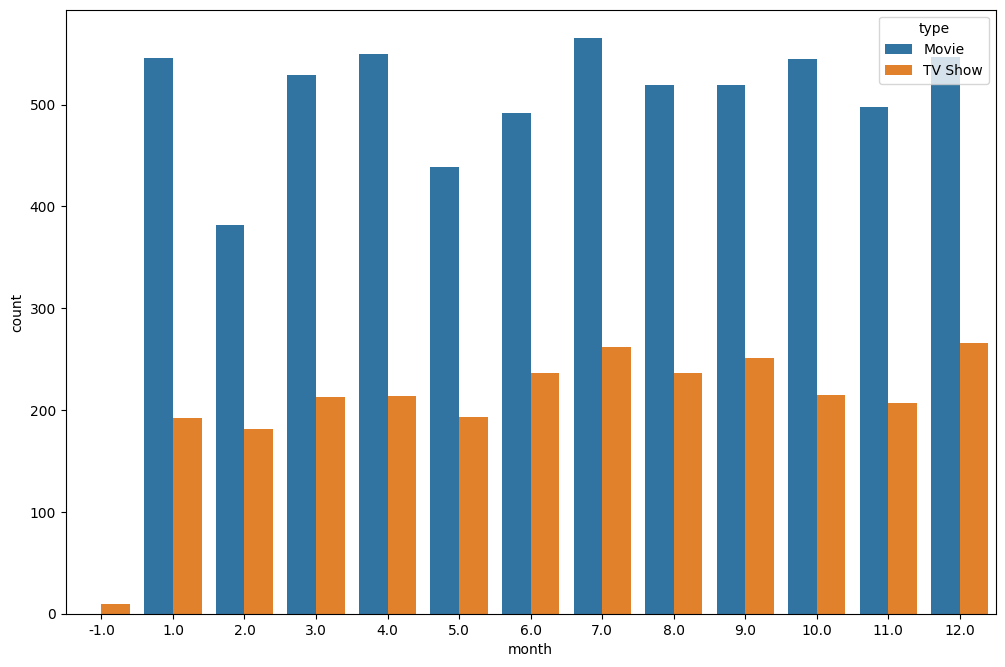

In [268]:
sns.countplot(x='month',hue='type', data=df)

<AxesSubplot:xlabel='year', ylabel='count'>

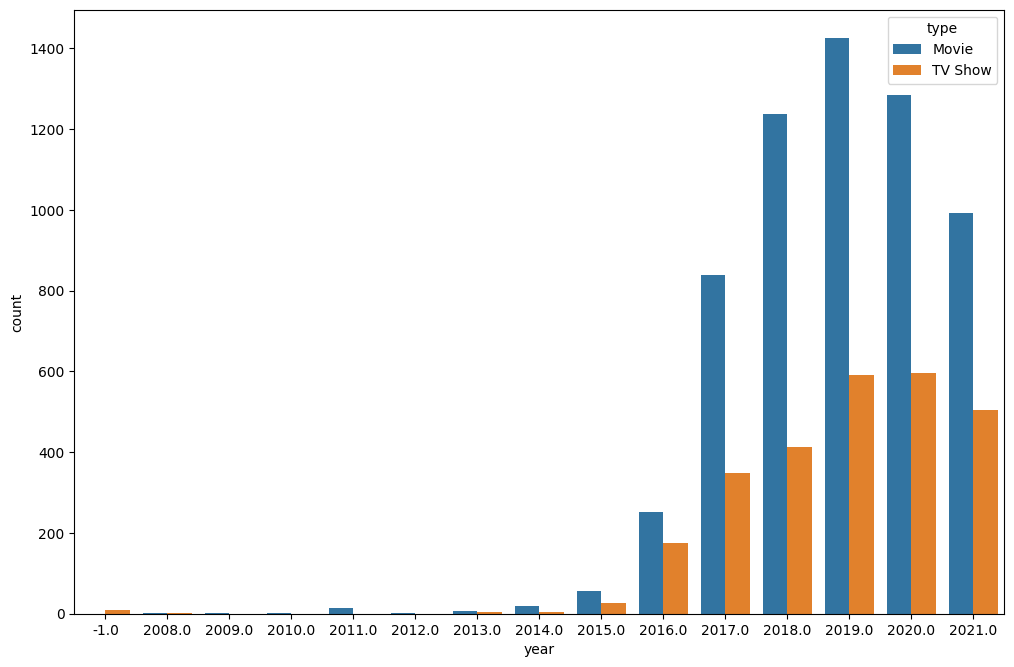

In [271]:
sns.countplot(x='year',hue='type', data=df)

In [145]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date_add,month,year
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021-09-25,9.0,2021.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021-09-24,9.0,2021.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021-09-24,9.0,2021.0
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021-09-24,9.0,2021.0
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021-09-24,9.0,2021.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",2019-11-20,11.0,2019.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2019-07-01,7.0,2019.0
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,2019-11-01,11.0,2019.0
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",2020-01-11,1.0,2020.0


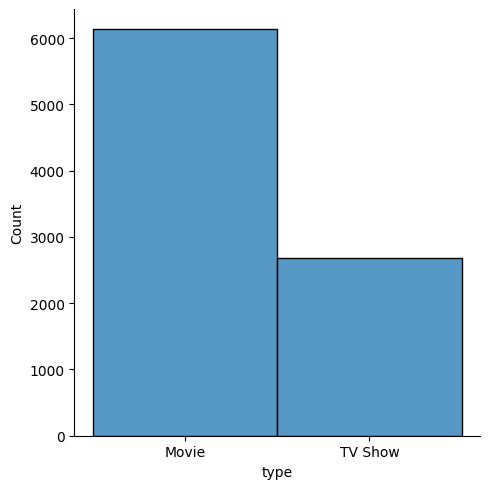

In [156]:
sns.displot(data=df ,x ='type')

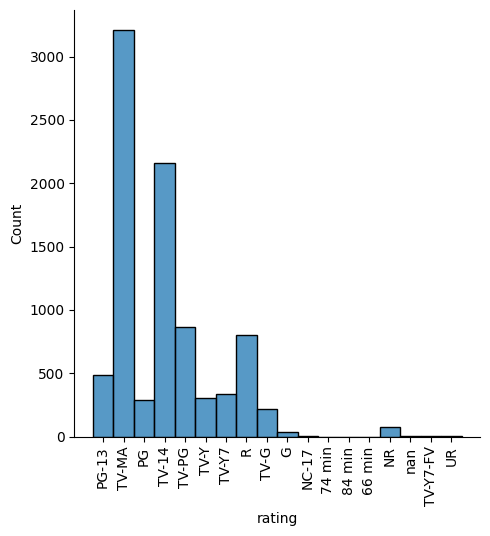

In [261]:
df['rating'] = df['rating'].astype(str)
df['type'] = df['type'].astype(str)
df['country'] = df['country'].astype(str)
sns.displot(data=df ,x ='rating')
plt.tick_params(axis='x', rotation=90)

/Users/KR20258655/opt/miniconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  self.fig.tight_layout(*args, **kwargs)


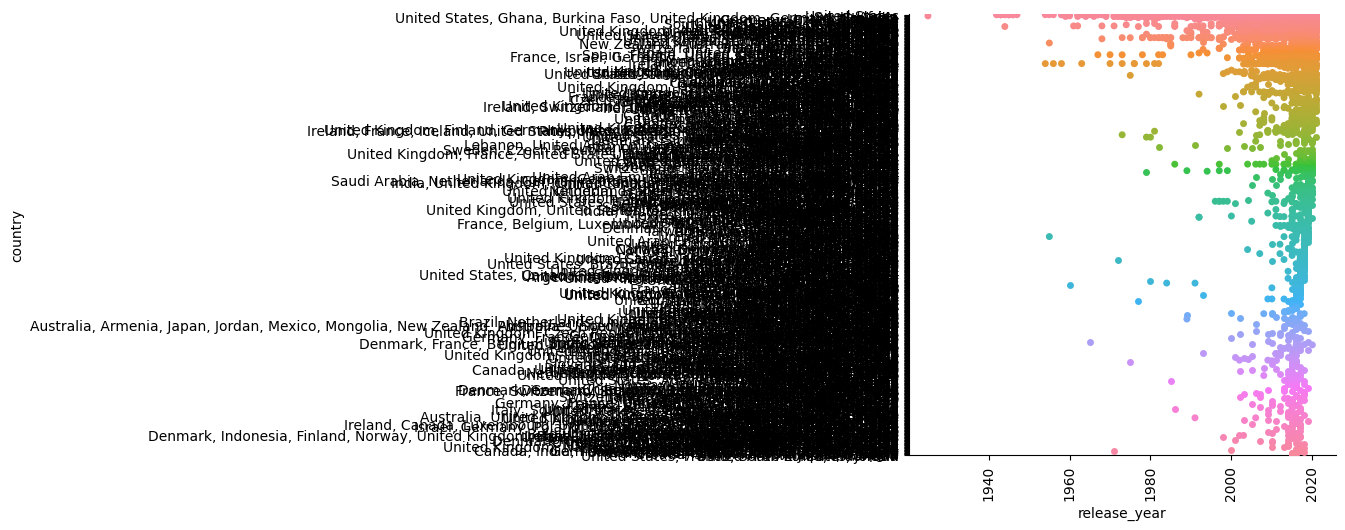

In [166]:
sns.catplot(data=df, x="release_year", y='country')
plt.tick_params(axis='x', rotation=90)

<AxesSubplot:xlabel='rating', ylabel='release_year'>

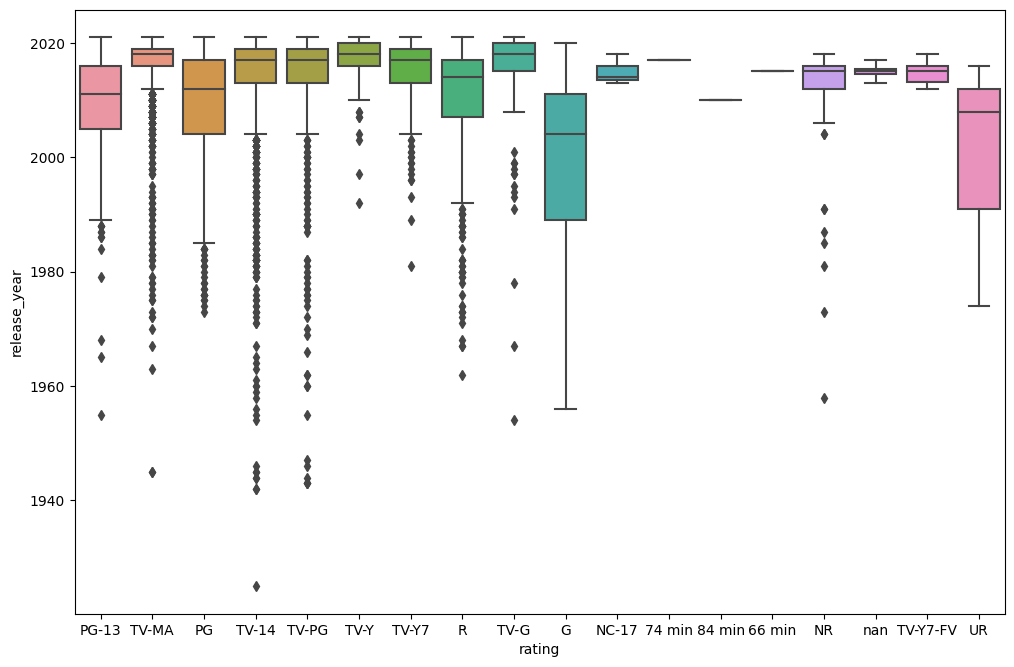

In [175]:
sns.boxplot(data=df, x="rating", y="release_year")

<AxesSubplot:xlabel='rating', ylabel='month'>

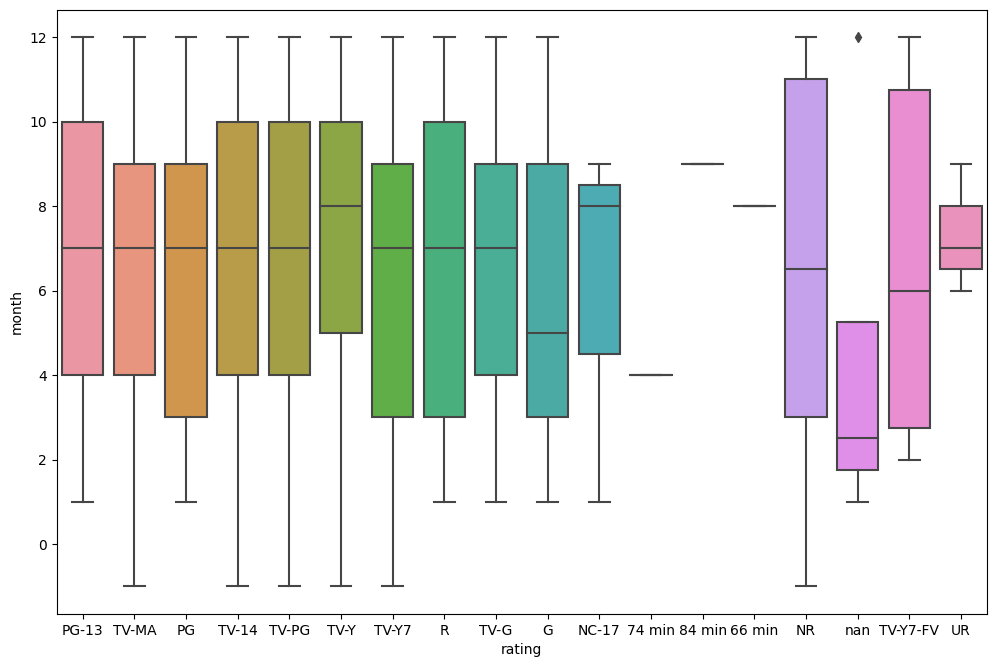

In [176]:
sns.boxplot(data=df, x="rating", y="month")

<AxesSubplot:xlabel='rating', ylabel='month'>

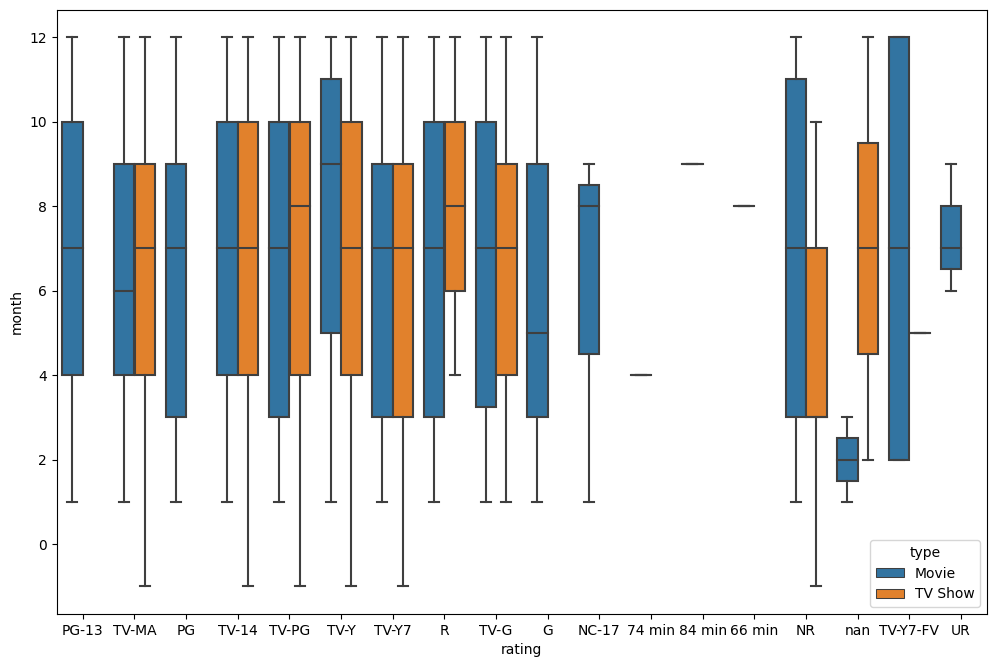

In [177]:
sns.boxplot(data=df, x="rating", y="month", hue='type')

In [186]:
# # plt.figure(figsize=(30,15))
# sns.boxplot(data=df, x="type", y="month", hue='year')
# plt.tick_params(axis='x', rotation=90)
# # plt.show()

<AxesSubplot:>

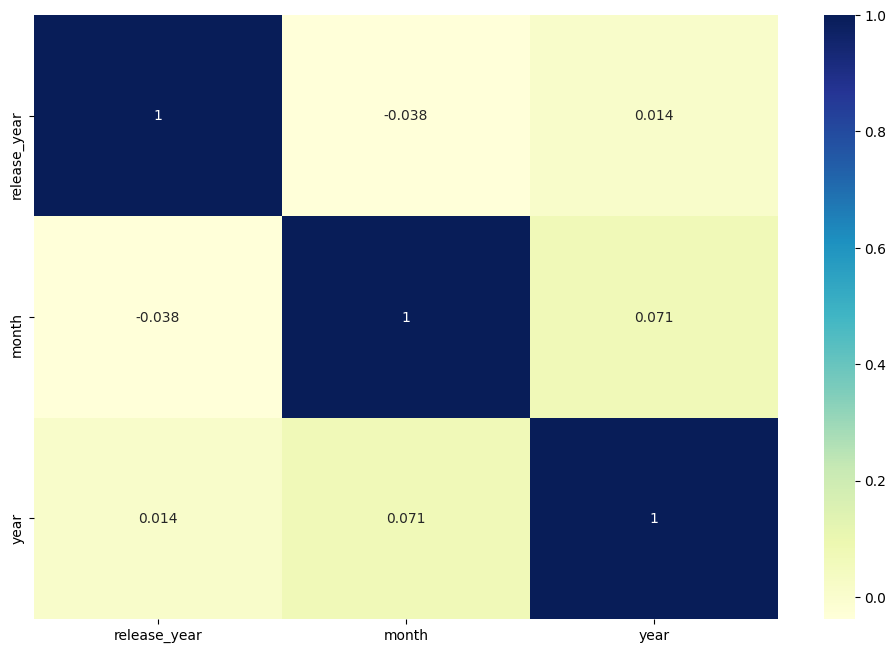

In [188]:
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True) 
  

# Country wise analysis

In [ ]:
# below plot show that country wise which show is famous and what kind of rating provided in year

-------------------------------------------------------------------------------- United States


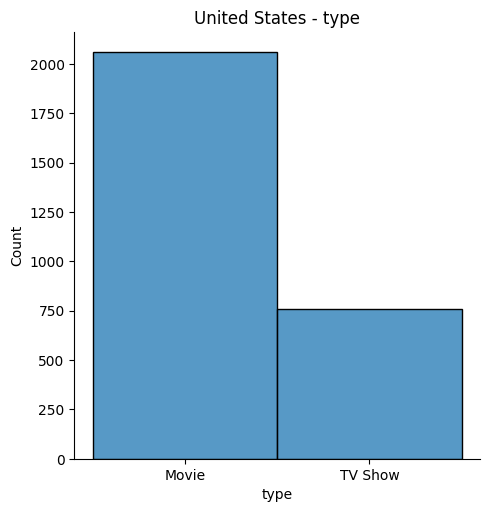

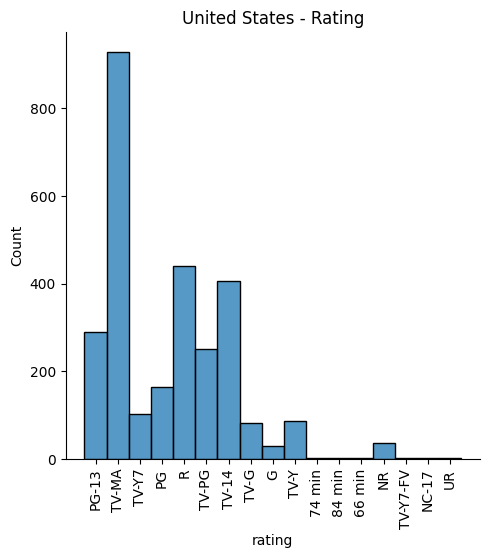

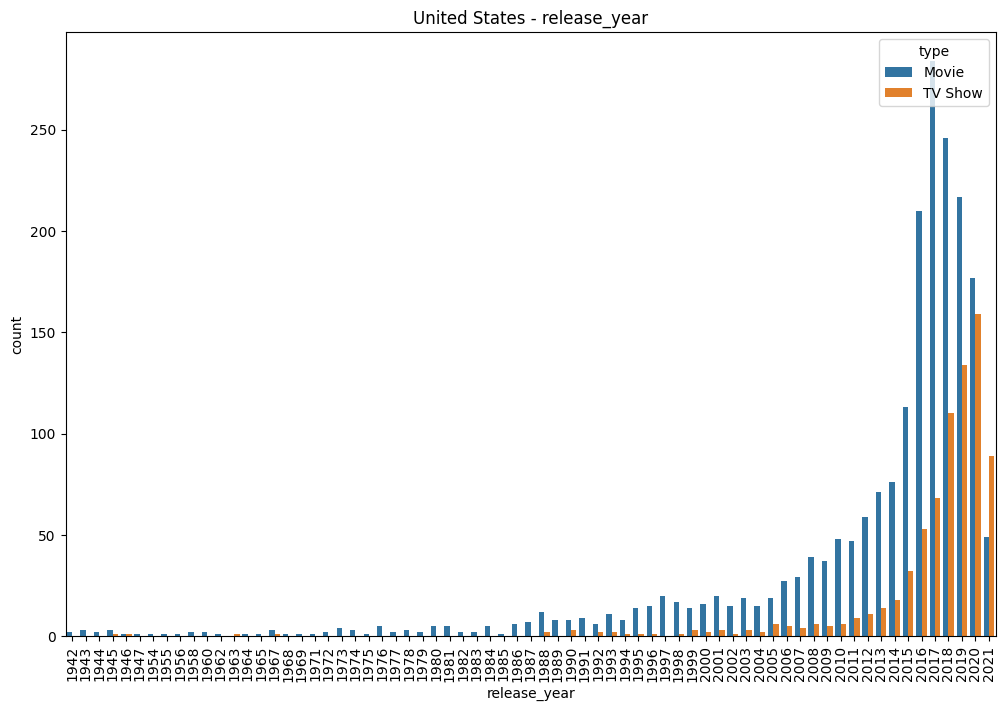

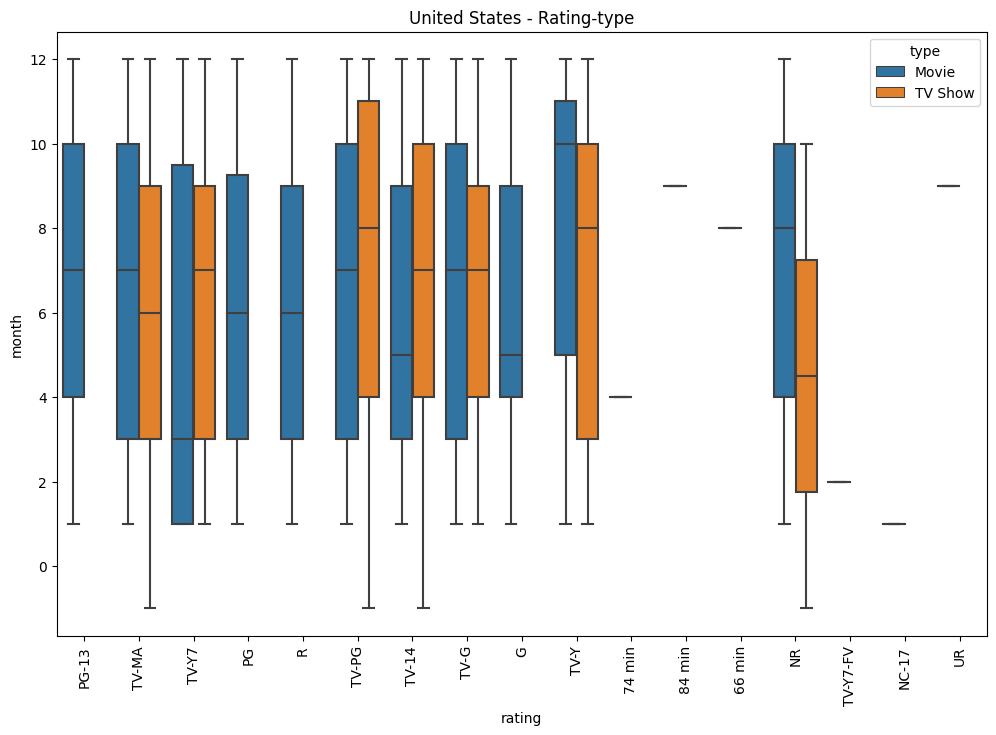

-------------------------------------------------------------------------------- nan


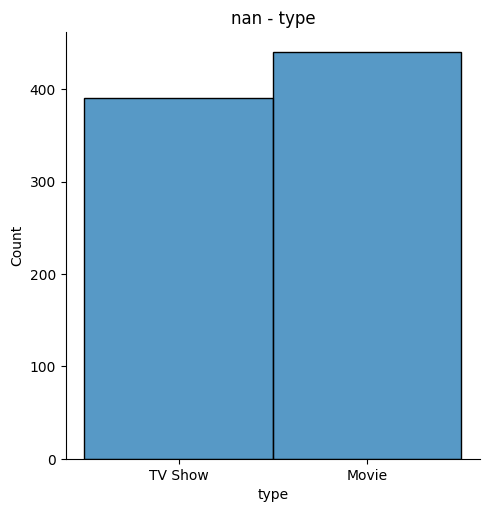

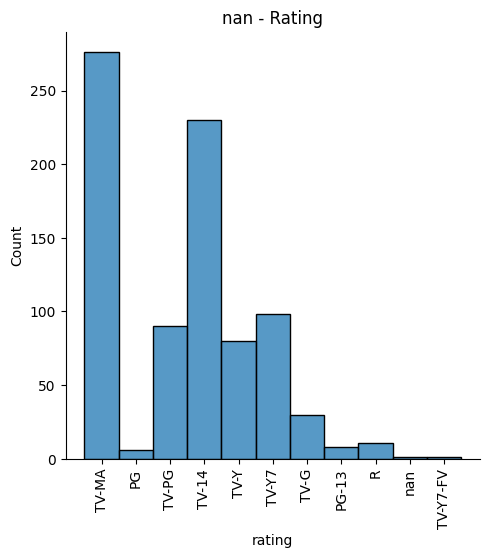

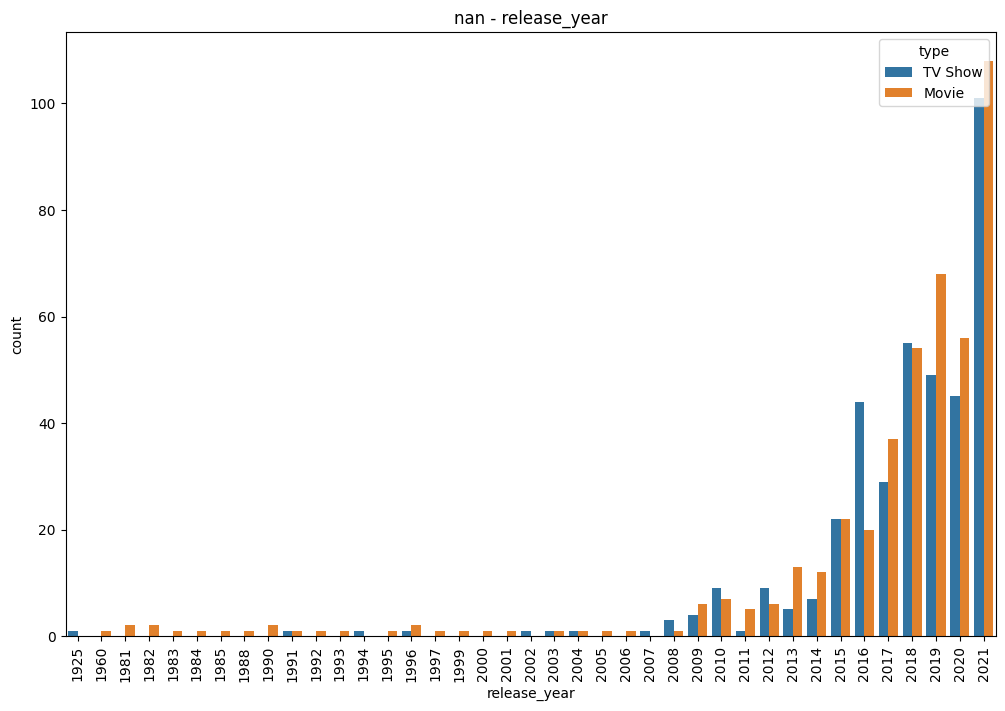

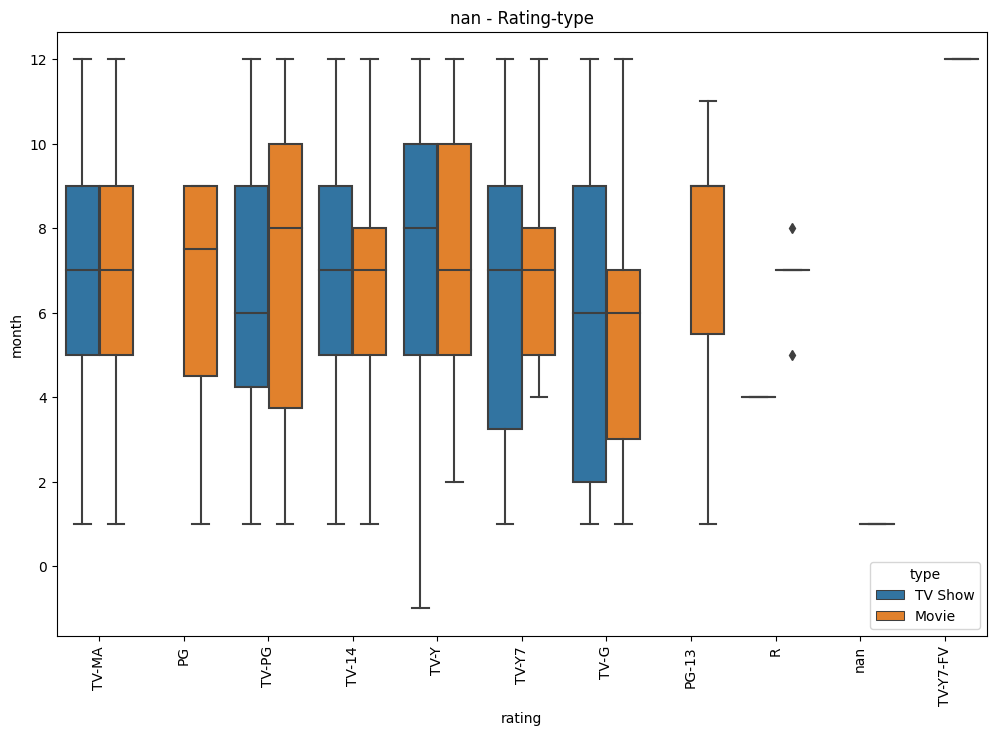

-------------------------------------------------------------------------------- India


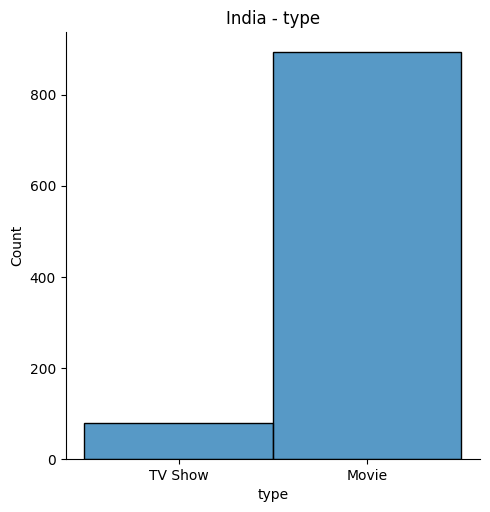

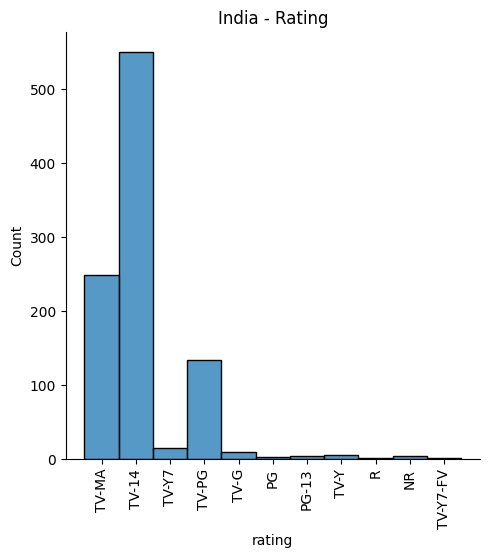

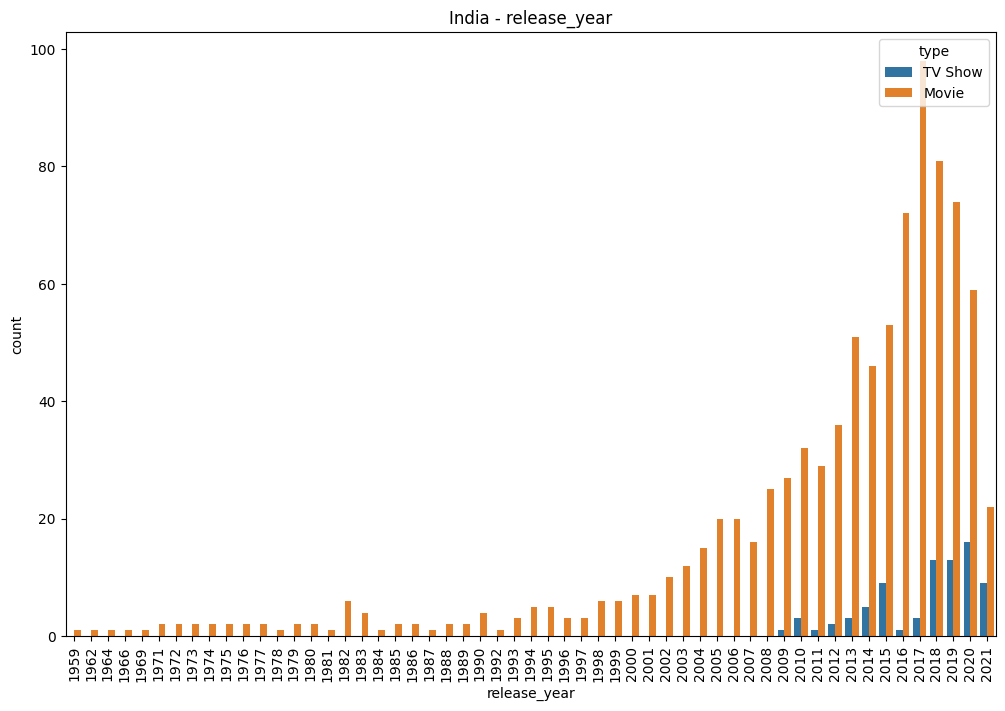

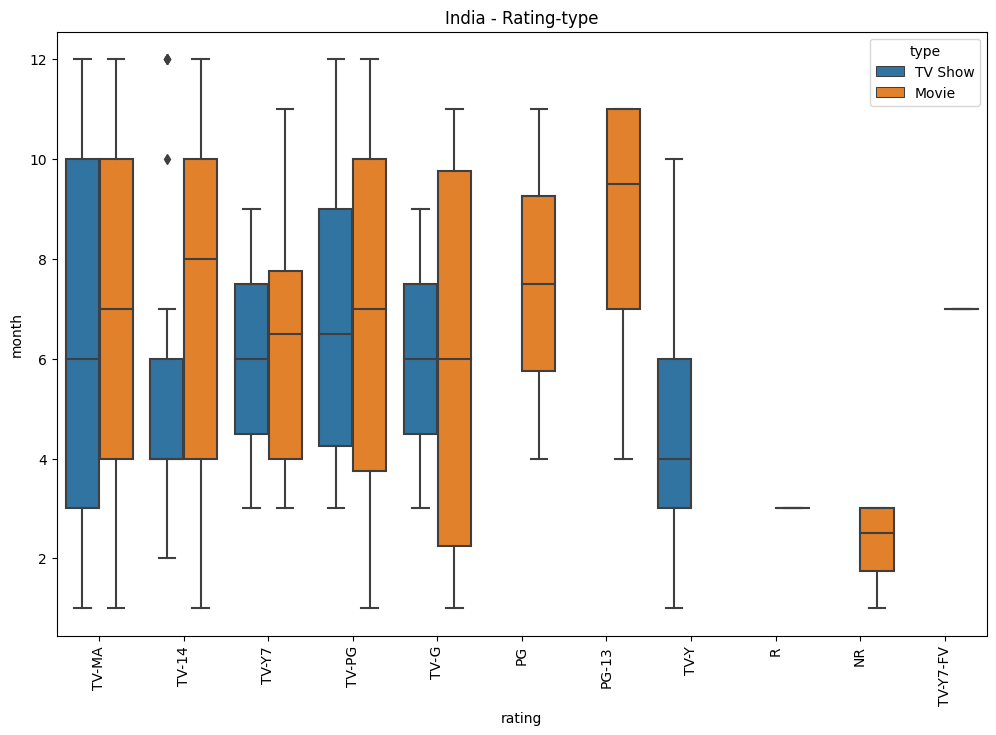

-------------------------------------------------------------------------------- United Kingdom


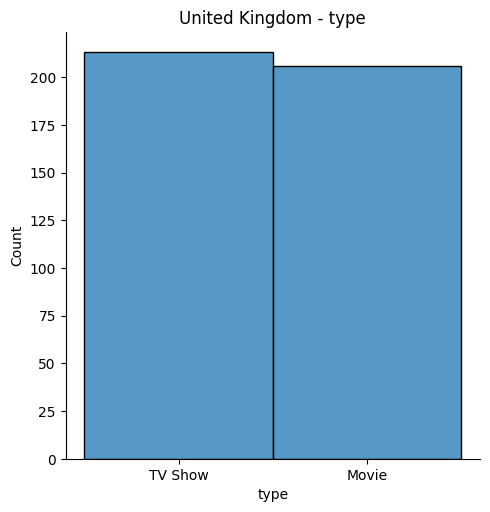

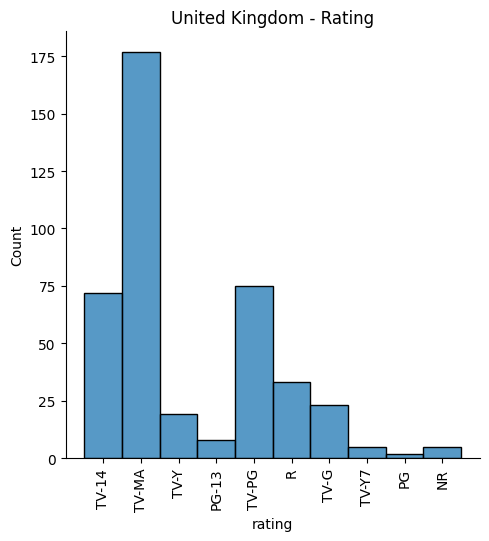

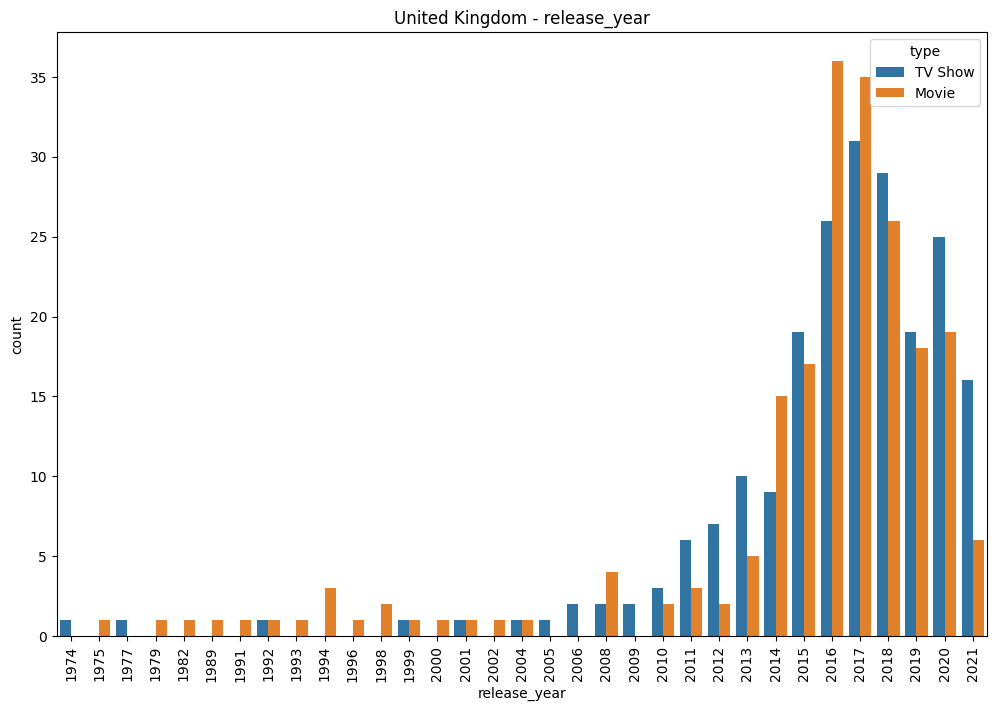

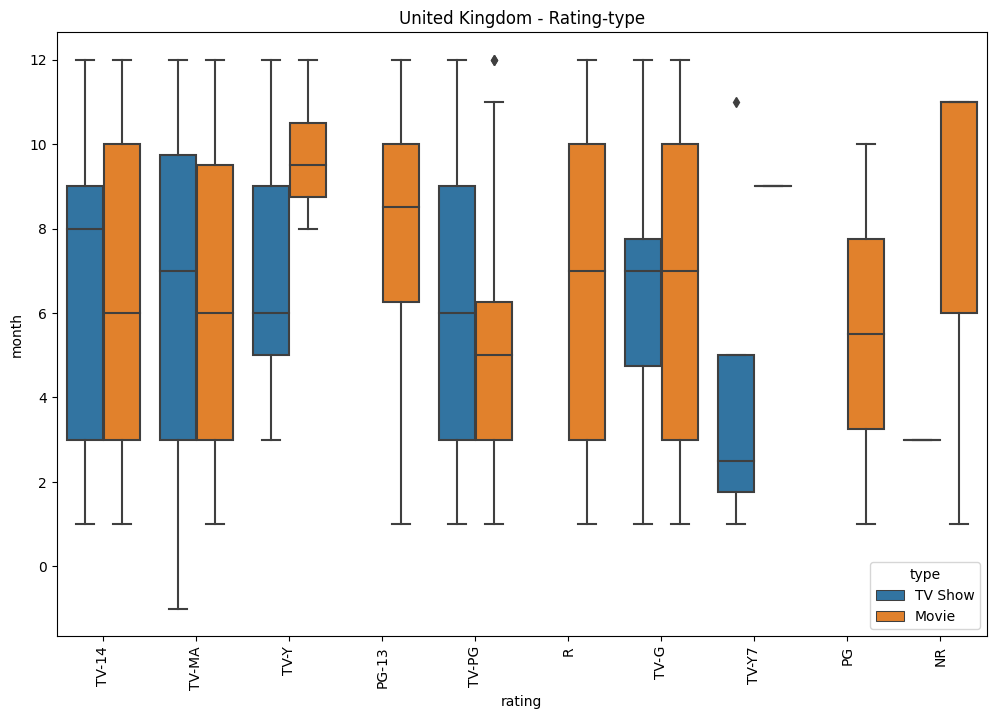

-------------------------------------------------------------------------------- Japan


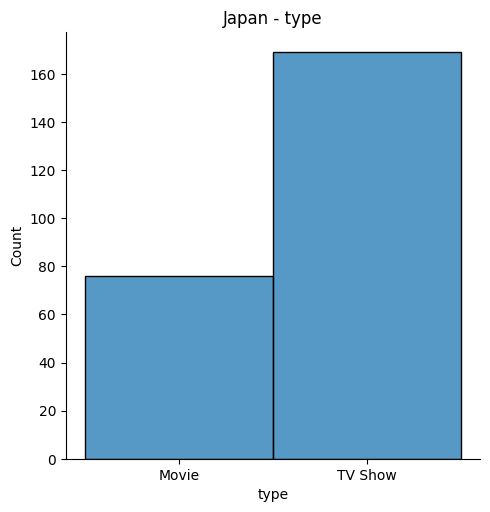

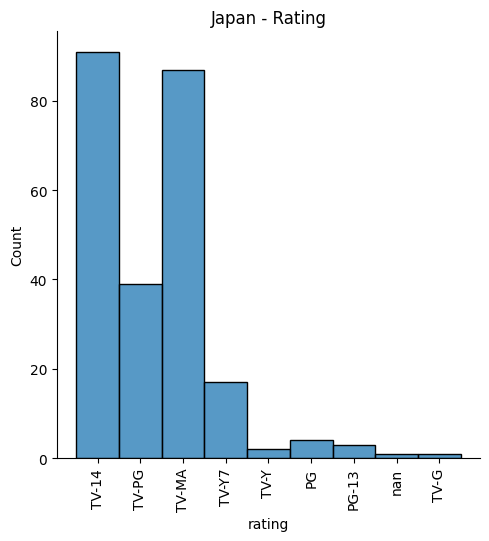

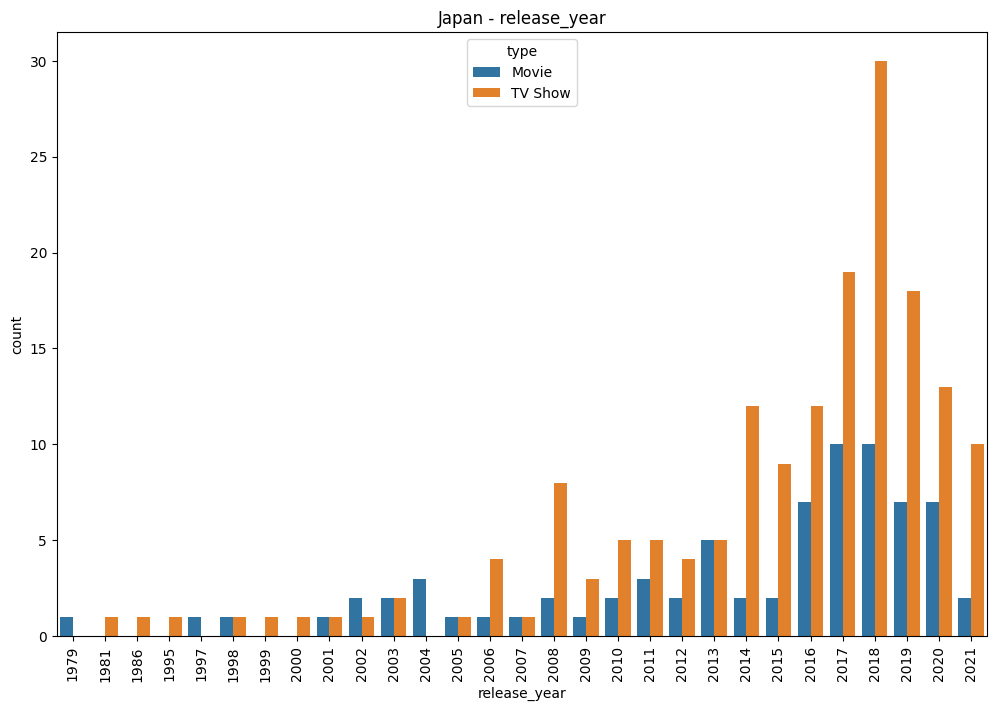

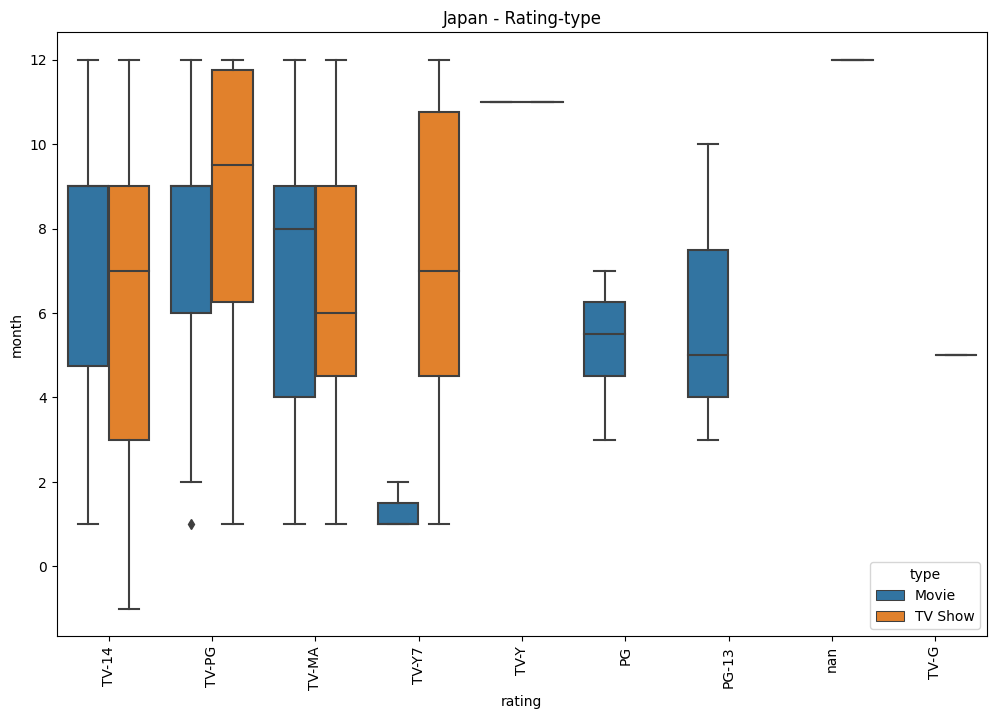

-------------------------------------------------------------------------------- South Korea


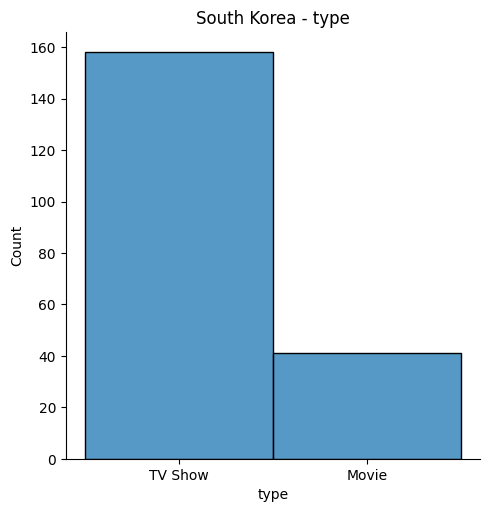

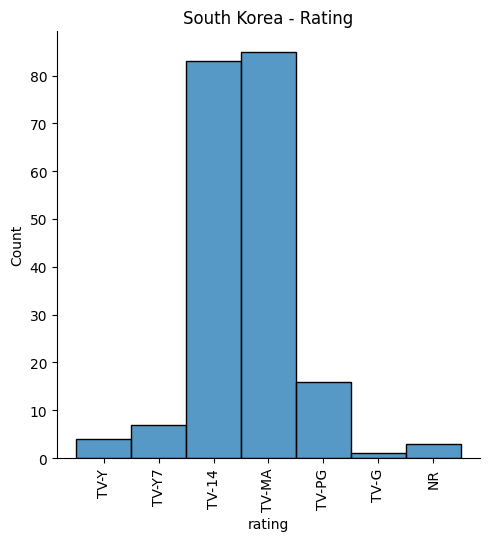

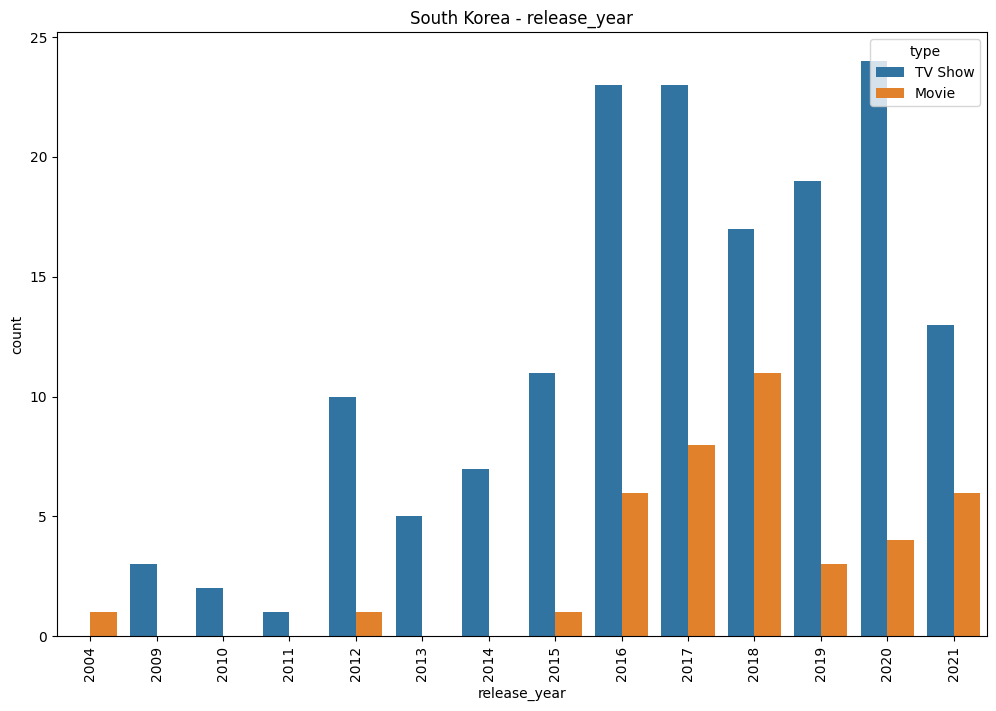

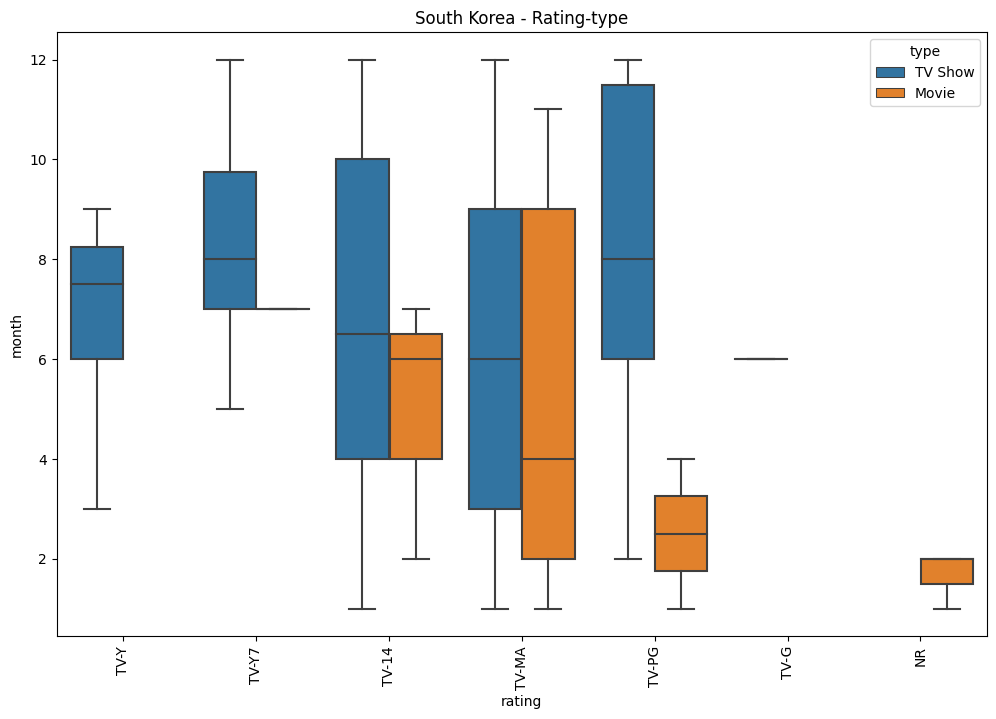

-------------------------------------------------------------------------------- Canada


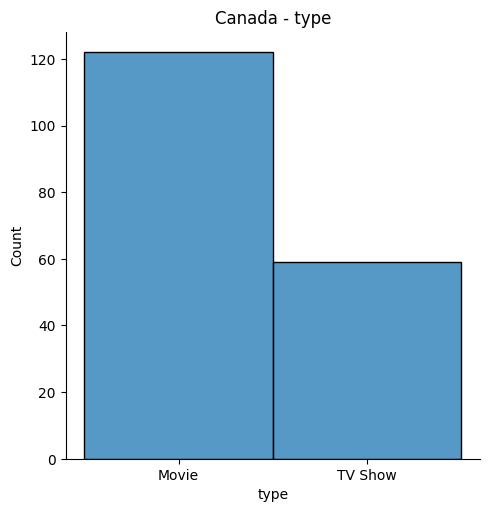

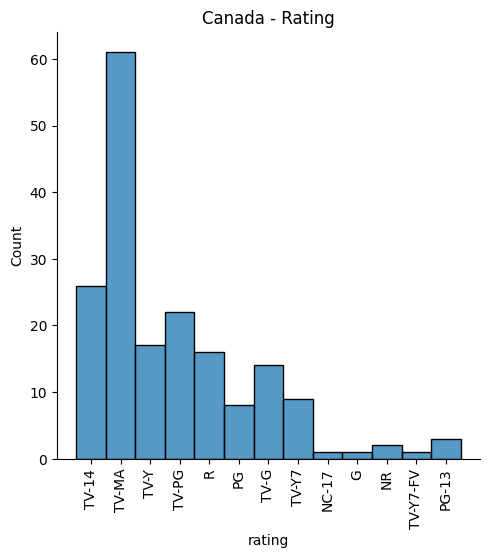

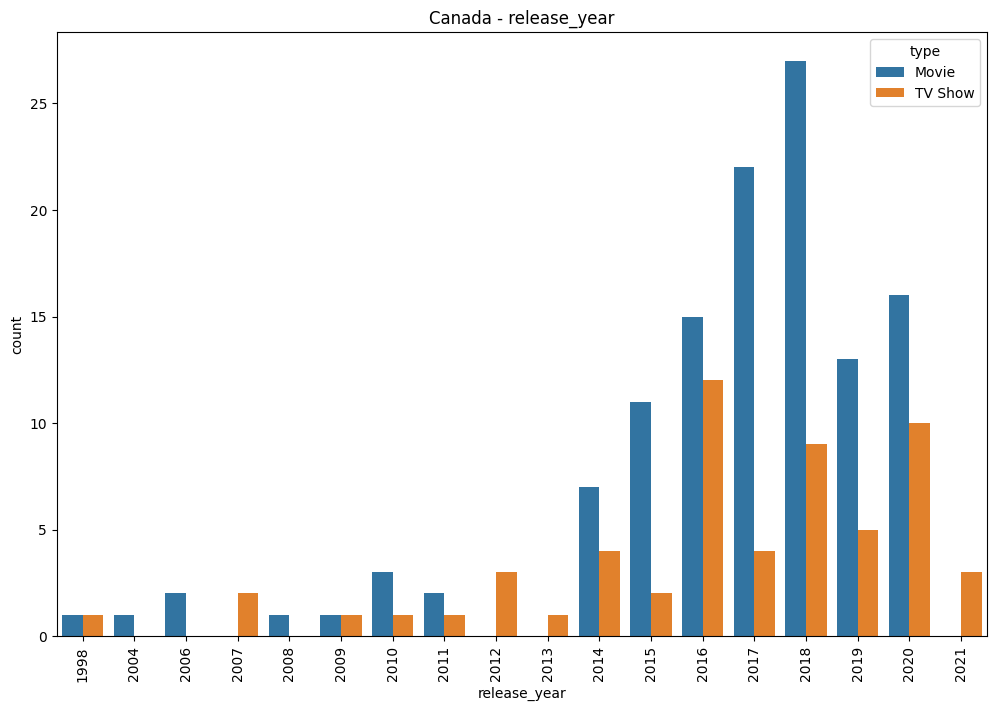

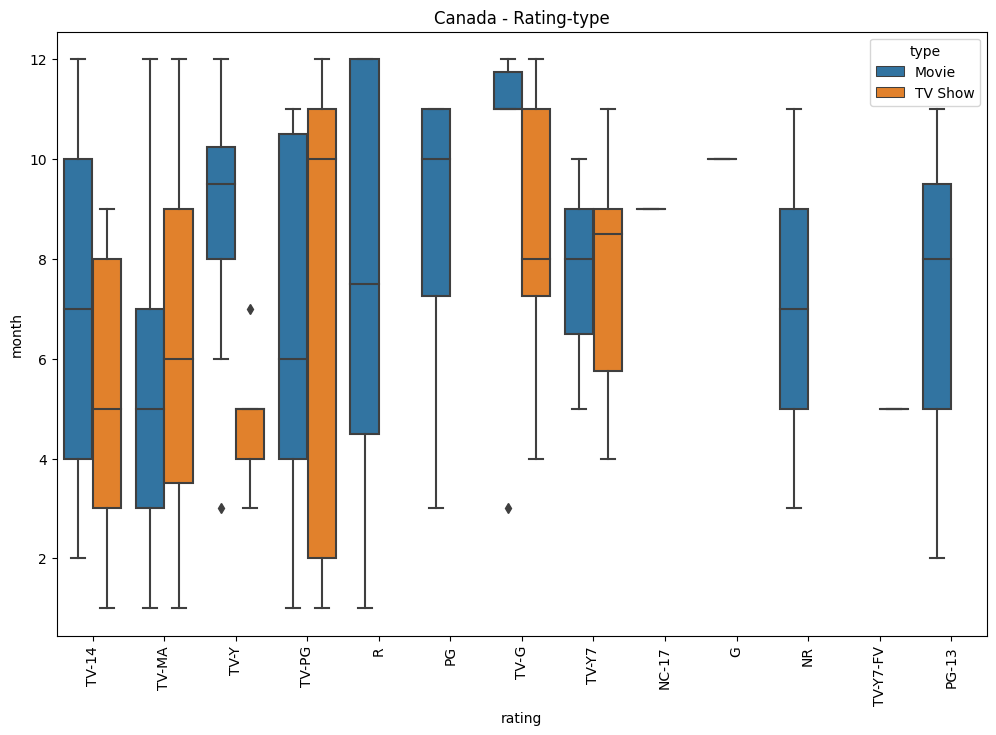

-------------------------------------------------------------------------------- Taiwan


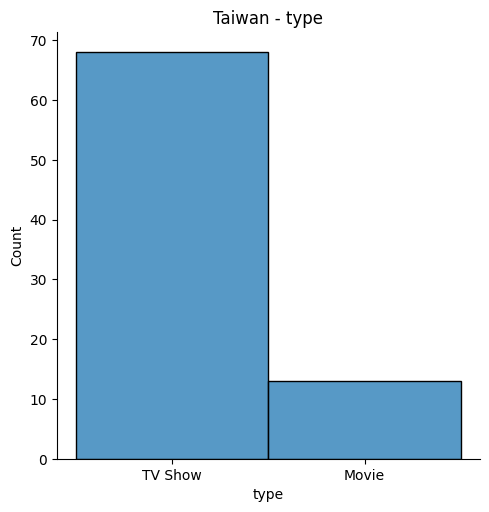

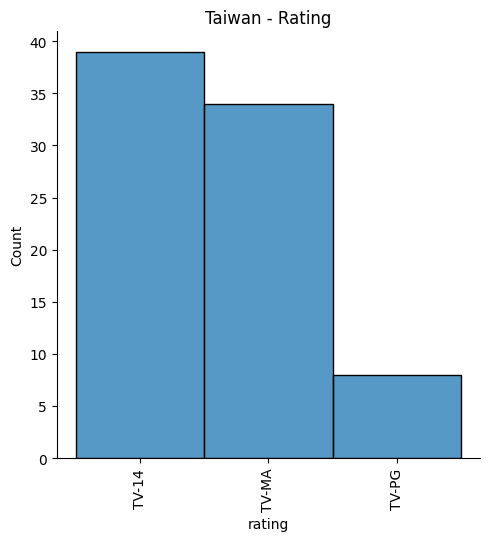

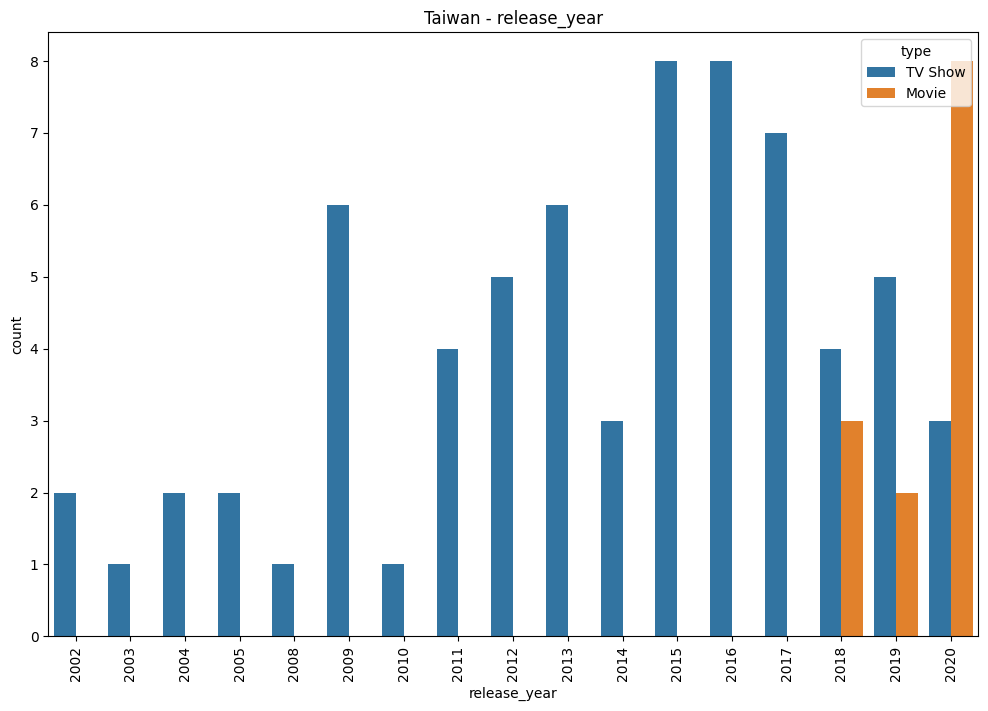

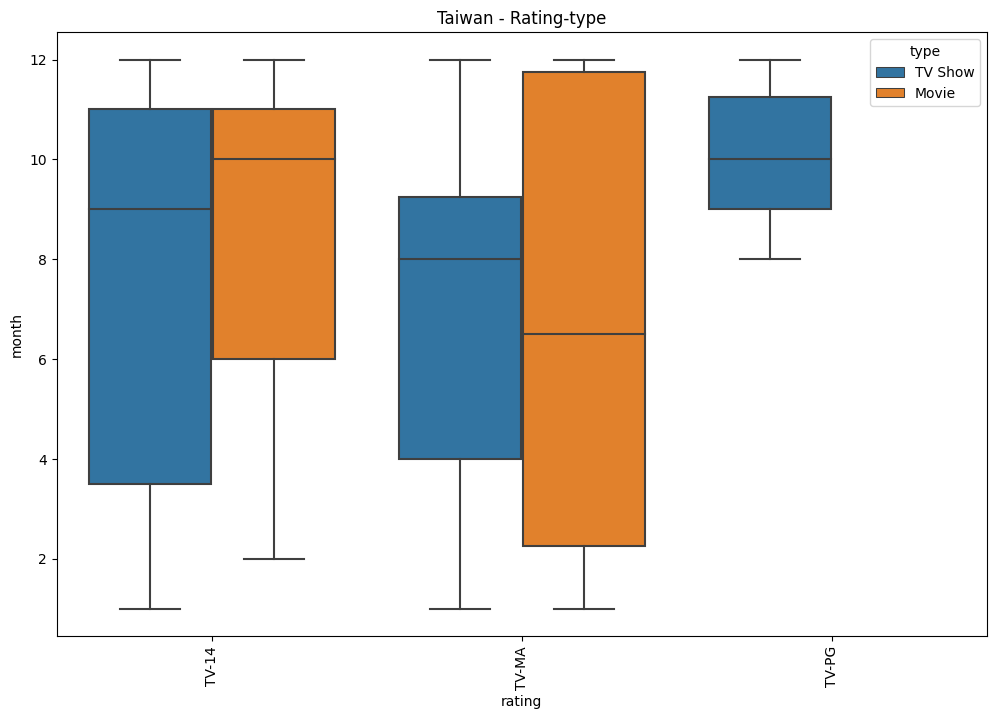

In [302]:
for cont in df.country.unique():
    cont_df = df[df['country']==cont]
    try:
        if (cont_df.type.value_counts()['TV Show'] > 50) or (cont_df.type.value_counts()['Movies'] > 50):
            print("--"*40, cont)

            sns.displot(data=cont_df ,x ='type')
            plt.title(f"{cont} - type")
            plt.show()

            sns.displot(x ='rating', data=cont_df)
            plt.title(f"{cont} - Rating")
            plt.tick_params(axis='x', rotation=90)
            plt.show()

            plt.title(f"{cont} - release_year")
            sns.countplot(x='release_year',hue='type', data=cont_df)
            plt.tick_params(axis='x', rotation=90)
            plt.show()

            plt.title(f"{cont} - Rating-type")
            sns.boxplot(data=cont_df, x="rating", y="month", hue='type')
            plt.tick_params(axis='x', rotation=90)
            plt.show()
    except:
        pass
    


# outlier and missing values

# Missing Value & Outlier check (Treatment optional)

In [190]:
# Missing values in %
df.isnull().sum()/len(df) *100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          0.000000
date_added       0.113546
release_year     0.000000
rating           0.000000
duration         0.034064
listed_in        0.000000
description      0.000000
date_add         0.113546
month            0.000000
year             0.000000
dtype: float64

# Split duration columns to mints for movies and seasond for TV show

In [235]:
def duration_split(x):
    x = x.split()
    return x[0]


df['duration_in_min'] = df.duration.apply(lambda x : duration_split(str(x)))

In [236]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_in_min
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",2
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


In [255]:
df[(df['type']=='Movie') & (df['type'].notnull())]['duration_in_min'].astype(float).describe()

count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_in_min, dtype: float64

/Users/KR20258655/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration_in_min', ylabel='Density'>

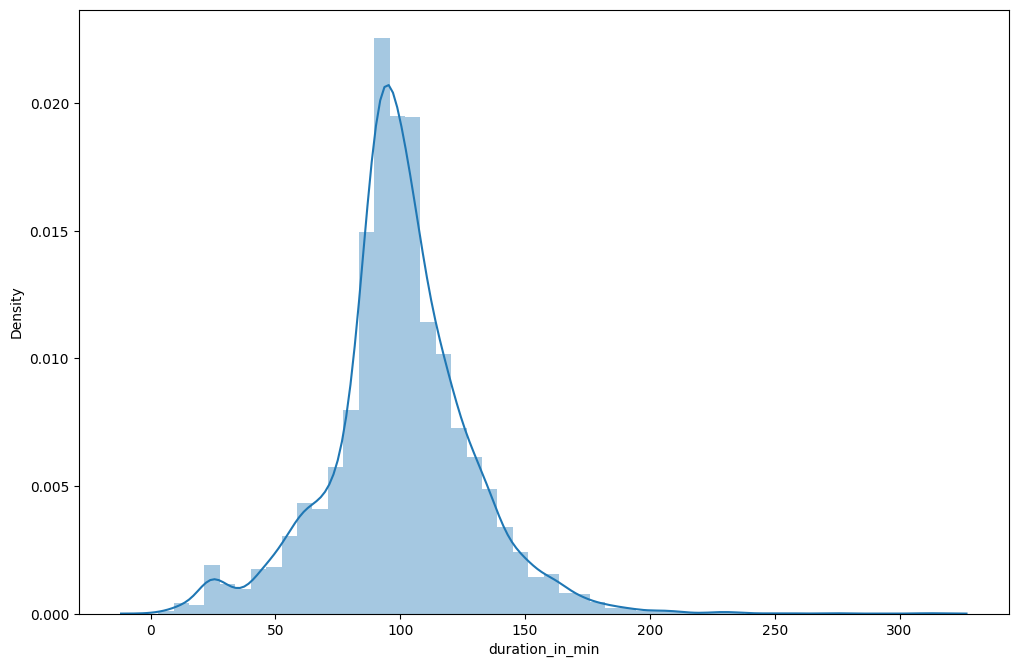

In [256]:
sns.distplot(df[(df['type']=='Movie') & (df['type'].notnull())]['duration_in_min'].astype(float))

In [243]:
df[df['type']=='TV Show']['duration_in_min'].astype(int).describe()

count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration_in_min, dtype: float64

/Users/KR20258655/opt/miniconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'duration_in_season')

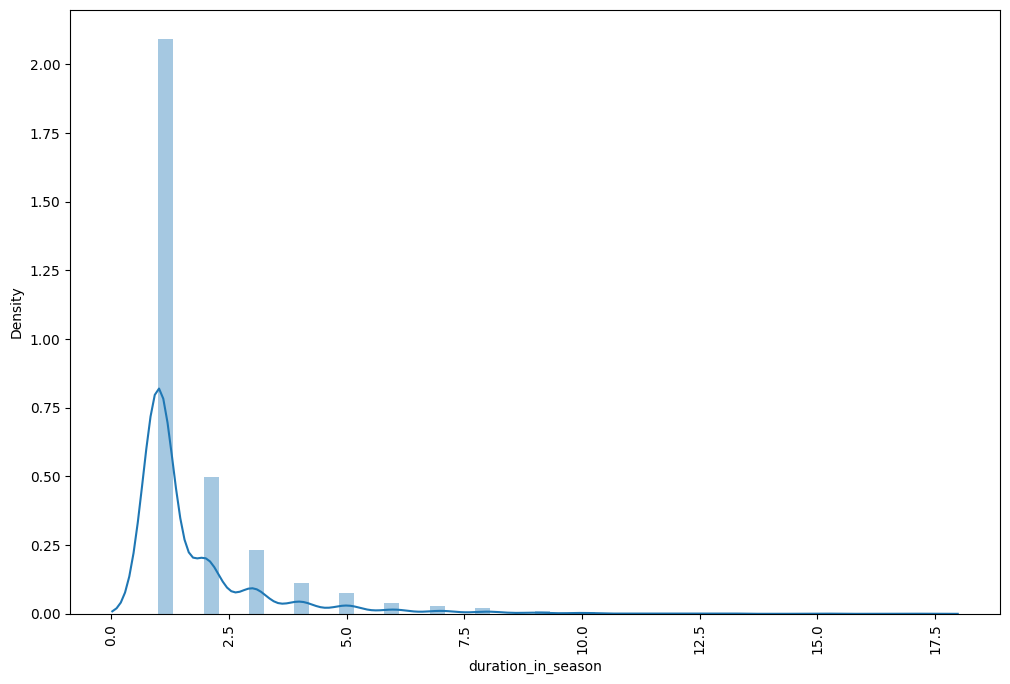

In [257]:
sns.distplot(df[df['type']=='TV Show']['duration_in_min'].astype(int))
plt.tick_params(axis='x', rotation=90)
plt.xlabel('duration_in_season')

6. Insights based on Non-Graphical and Visual Analysis (10 Points)

6.1 Comments on the range of attributes

6.2 Comments on the distribution of the variables and relationship between them

6.3 Comments for each univariate and bivariate plot



### duration of movies 90% in range of 90-120 minutes

### average duration of series mean is 1.764948 and 75% of distribution is 2.0 menas on an average most of season has length of 2

7. Business Insights (10 Points) - Should include patterns observed in the data along with what you can infer from it

8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand



In [380]:
for cont in df.country.unique():
    cont_df = df[df['country']==cont]
    if cont != 'nan':
        g = cont_df.groupby(['release_year', 'type'])['title'].count().reset_index()
        g1 = cont_df.groupby(['month'])['title'].count().reset_index()

        try:
            if (cont_df.type.value_counts()['TV Show'] > 50) or (cont_df.type.value_counts()['Movies'] > 50):
                print("*"*20, cont, "*"*20)
                # print("--"*40)
                print(g.sort_values(by='title', ascending=False)[:5])
                print("--"*40)
                print(g1.sort_values(by='title', ascending=False)[:3])

                # print(cont_df.type.value_counts())
        except:
            pass
    # break

******************** United States ********************
    release_year   type  title
93          2017  Movie    284
95          2018  Movie    246
97          2019  Movie    217
91          2016  Movie    210
99          2020  Movie    177
--------------------------------------------------------------------------------
    month  title
1     1.0    299
11   11.0    264
7     7.0    253
******************** India ********************
    release_year   type  title
58          2017  Movie     98
60          2018  Movie     81
62          2019  Movie     74
56          2016  Movie     72
64          2020  Movie     59
--------------------------------------------------------------------------------
    month  title
11   12.0    109
3     4.0    107
9    10.0    103
******************** United Kingdom ********************
    release_year     type  title
38          2016    Movie     36
40          2017    Movie     35
41          2017  TV Show     31
43          2018  TV Show     29
39  

Based on the Netflix case study provided earlier, here are some business insights derived from the data analysis, along with inferences:

1. **Content Diversity by Country:**
   - **Insight:** The dataset reveals significant variations in content diversity across different countries like United States, India, United Kingdom, Japan, South Korea and Canada.
   - **Inference:** Netflix should consider tailoring its content strategy data show that resent year produce more number of movies to cater to the diverse preferences of viewers in these regions.

<br>

2. **Content Release Trends:**
   - **Insight:** The analysis of content release trends indicates that the number of movies and TV shows increaed over 1018 on words.
   - **Inference:** Netflix should pay close attention to the trends and adapt its content production strategy accordingly. For instance, if there is a surge in demand for TV shows and movies, Netflix may want to allocate more resources to TV show and movies production.

<br>

3. **TV Shows vs. Movies:**
   - **Insight:** The dataset suggests a shift in focus from TV shows to Movies in recent years.
   - **Inference:** To maximize viewer engagement, Netflix should continue to produce both TV shows and movies. However, the shift in focus towards Movies may indicate that viewers are increasingly interested in serialized content. This information can guide content production decisions.

<br>

4. **Optimal Launch Time:**
   - **Insight:** Analyzing viewer behavior patterns throughout the month of Oct, Nov, Dec, Jan and Feb. provides insights into when viewers are most active.
   - **Inference:** Netflix should schedule content releases during peak viewing times to maximize engagement. Launching content during periods when viewers are most active can lead to higher viewership and subscriber retention.

<br>

5. **Analysis of Actors/Directors:**
   - **Insight:** The dataset allows the identification of popular actors and directors associated with successful content.
   - **Inference:** Netflix should consider collaborating with these renowned actors and directors in future projects to leverage their appeal and increase the chances of content success.

<br>

6. **Global Expansion:**
   - **Insight:** The data shows that demand for Netflix content varies by country, with some regions having higher demand like United States, United Kingdom, India.
   - **Inference:** Netflix should consider expanding its presence in regions with high demand by acquiring licensing rights and forming partnerships with local production companies. This approach can facilitate international growth.

<br>

7. **Audience Engagement:**
   - **Insight:** Insights from user behavior data can help Netflix improve the recommendation algorithm and enhance the user experience by using regions, user based suggestion and also include columns cast, director, listed_in, description to provide recommandetion more efficient way.
   - **Inference:** Netflix should continue investing in data-driven strategies to enhance user engagement and satisfaction. This includes fine-tuning content recommendations and personalization features.

<br>

These business insights provide Netflix with actionable information to make informed decisions about content production, expansion, and user engagement. By recognizing and adapting to the observed patterns in the data, Netflix can remain a competitive force in the streaming industry and continue to meet the evolving preferences of its global audience.

Localization and Content Diversity:
Recommendation: Increase the production of localized content in regions with high demand.

Content Release Strategy:
Recommendation: Stay flexible and adapt content production based on trends. Allocate resources based on the demand for TV shows and movies.

Balanced Content Mix:
Recommendation: Continue producing a mix of TV shows and movies. Prioritize serialized content to cater to changing viewer preferences.

Optimal Launch Times:
Recommendation: Schedule content releases during peak viewing times to maximize audience engagement and retention.

Collaboration with Popular Talent:
Recommendation: Collaborate with well-known actors and directors to enhance the appeal of content and increase the likelihood of success.

Global Expansion:
Recommendation: Explore opportunities for expansion in regions with high demand by acquiring licensing rights and partnering with local production companies.

Enhanced User Experience:
Recommendation: Continue to invest in improving the recommendation algorithm and personalization features to enhance user satisfaction and engagement.


These recommendations are straightforward and actionable, designed to guide Netflix in making informed decisions and optimizing its content strategy for the benefit of both the company and its subscribers.

